In [1]:
import pandas as pd

df_coffee = pd.read_feather('data/coffee_ratings_full.feather')
df_coffee


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,40,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,None,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [3]:
coffee_focus = df_coffee[['variety','country_of_origin','flavor']]
coffee_focus = coffee_focus.reset_index()
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


In [5]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)
coffee_resamp

,index,variety,country_of_origin,flavor
703,703,Caturra,Colombia,7.58
93,93,None,United States (Hawaii),8.17
833,833,Bourbon,Guatemala,7.50
1242,1242,None,Colombia,7.17
444,444,Catimor,Vietnam,7.42
...,...,...,...,...
97,97,Caturra,Colombia,7.92
15,15,Other,United States,8.50
712,712,Bourbon,Brazil,7.83
469,469,Caturra,Colombia,7.67


In [7]:
coffee_focus['index'].value_counts()

index
0       1
898     1
896     1
895     1
894     1
       ..
445     1
444     1
443     1
442     1
1337    1
Name: count, Length: 1338, dtype: int64

In [9]:
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset='index'))
num_unique_coffees

866

In [11]:
import numpy as np

mean_flavors_1000 = []

for i in range(1000):
    mean_flavors_1000.append(np.mean(
        coffee_focus.sample(frac=1, replace=True)['flavor']))

(array([  2.,  14.,  60., 188., 305., 277., 119.,  29.,   3.,   3.]),
 array([7.48974589, 7.49730867, 7.50487145, 7.51243423, 7.51999701,
        7.52755979, 7.53512257, 7.54268535, 7.55024813, 7.55781091,
        7.56537369]),
 <BarContainer object of 10 artists>)

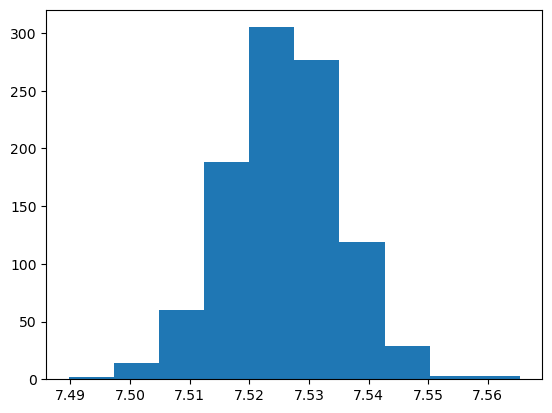

In [13]:
import matplotlib.pyplot as plt

plt.hist(mean_flavors_1000)

In [14]:
coffee_sample = df_coffee[['variety', 'country_of_origin', 'flavor']].\
reset_index().sample(n=500)
coffee_sample

,index,variety,country_of_origin,flavor
630,630,Blue Mountain,Mexico,7.58
1042,1042,Caturra,Panama,7.33
88,88,Other,Ethiopia,8.00
1302,1302,None,Brazil,7.00
1304,1304,Catuai,Honduras,6.17
...,...,...,...,...
232,232,Caturra,Colombia,7.50
756,756,Bourbon,Brazil,7.42
44,44,SL28,Kenya,8.08
502,502,Caturra,Vietnam,7.67


In [17]:
#The bootstrap of mean coffee flavors

import numpy as np

mean_flavors_5000 = []

for i in range(5000):
    mean_flavors_5000.append(
        np.mean(coffee_sample.sample(frac=1, replace=True)['flavor']))

(array([  11.,   74.,  298.,  737., 1289., 1255.,  876.,  352.,   87.,
          21.]),
 array([7.49806 , 7.509114, 7.520168, 7.531222, 7.542276, 7.55333 ,
        7.564384, 7.575438, 7.586492, 7.597546, 7.6086  ]),
 <BarContainer object of 10 artists>)

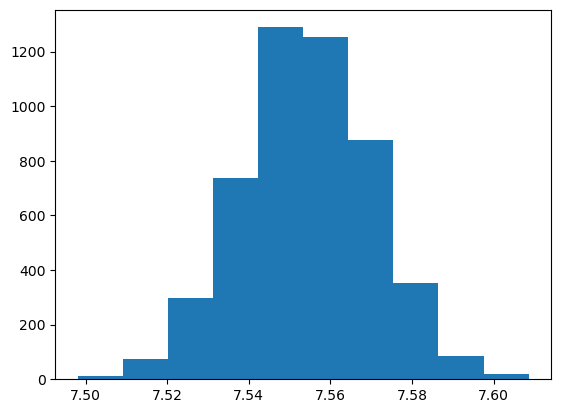

In [18]:
plt.hist(mean_flavors_5000)

In [19]:
coffee_sample['flavor'].mean()

7.55442

In [23]:
np.mean(mean_flavors_5000)

7.554243131999999

In [25]:
df_coffee['flavor'].mean()

7.526046337817639

In [27]:
coffee_sample['flavor'].std()

0.3573015426565769

In [29]:
#bootstrap'in standart hatasını bulmuş olduk
np.std(mean_flavors_5000,ddof=1)

0.01606660242780939

In [31]:
#bootstrap örneklem standart sapması
np.std(mean_flavors_5000, ddof=1) * np.sqrt(500)

0.3592601519604496

(array([  11.,   74.,  298.,  737., 1289., 1255.,  876.,  352.,   87.,
          21.]),
 array([7.49806 , 7.509114, 7.520168, 7.531222, 7.542276, 7.55333 ,
        7.564384, 7.575438, 7.586492, 7.597546, 7.6086  ]),
 <BarContainer object of 10 artists>)

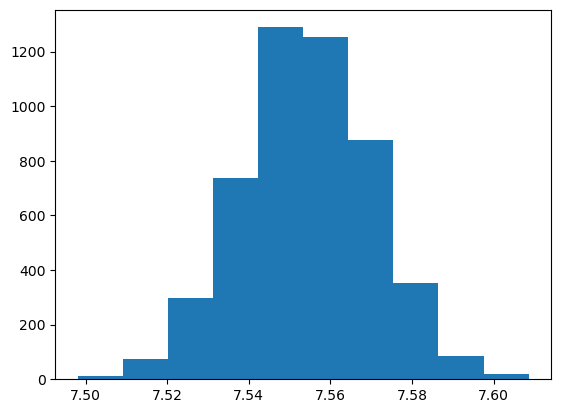

In [33]:
plt.hist(mean_flavors_5000)

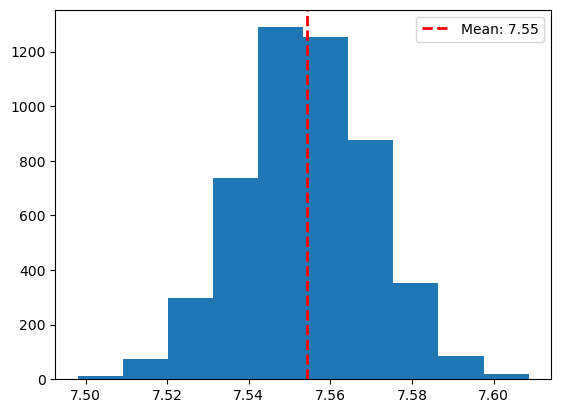

In [35]:
plt.hist(mean_flavors_5000);
plt.axvline(np.mean(mean_flavors_5000), color='red', linestyle='dashed', 
            linewidth=2, label=f'Mean: {np.mean(mean_flavors_5000):.2f}')
plt.legend()

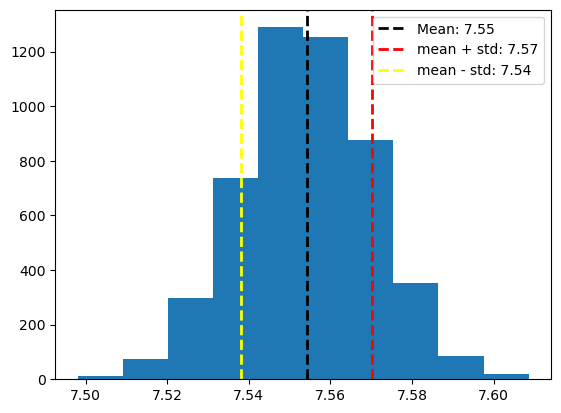

In [37]:
mean = np.mean(mean_flavors_5000)
plus_one_std = mean + np.std(mean_flavors_5000, ddof=1)
minus_one_std = mean - np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(plus_one_std, color='red', linestyle='dashed', linewidth=2, label=f'mean + std: {plus_one_std:.2f}')

plt.axvline(minus_one_std, color='yellow', linestyle='dashed', linewidth=2, label=f'mean - std: {minus_one_std:.2f}')

plt.legend()

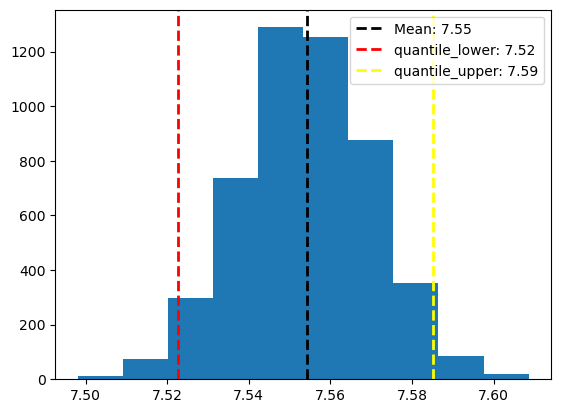

In [39]:
quantile_lower = np.quantile(mean_flavors_5000, 0.025)
quantile_upper = np.quantile(mean_flavors_5000, 0.975)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(quantile_lower, color='red', linestyle='dashed', linewidth=2, label=f'quantile_lower: {quantile_lower:.2f}')

plt.axvline(quantile_upper, color='yellow', linestyle='dashed', linewidth=2, label=f'quantile_upper: {quantile_upper:.2f}')

plt.legend()

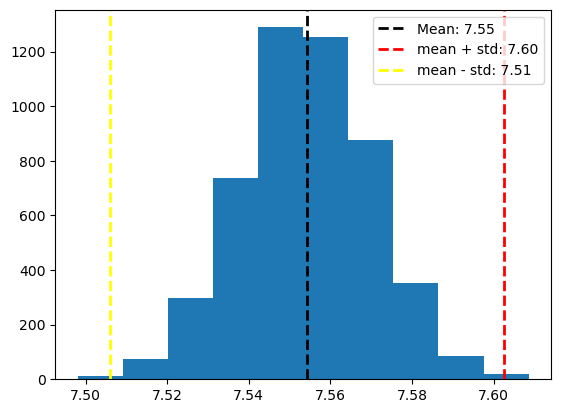

In [41]:
mean = np.mean(mean_flavors_5000)
plus_one_std = mean + 3 * np.std(mean_flavors_5000, ddof=1)
minus_one_std = mean - 3 * np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000);

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(plus_one_std, color='red', linestyle='dashed', linewidth=2, label=f'mean + std: {plus_one_std:.2f}')

plt.axvline(minus_one_std, color='yellow', linestyle='dashed', linewidth=2, label=f'mean - std: {minus_one_std:.2f}')

plt.legend()

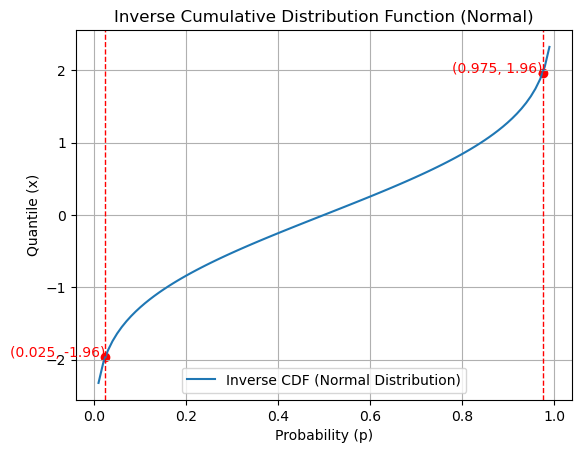

In [43]:
from scipy.stats import norm

p_values = np.linspace(0, 1, 100)

quantiles = norm.ppf(p_values, loc=0, scale=1)

plt.plot(p_values, quantiles, label="Inverse CDF (Normal Distribution)")

p1, p2 = 0.025, 0.975
quantile_025 = norm.ppf(p1)
quantile_975 = norm.ppf(p2)

plt.scatter([p1, p2], [quantile_025, quantile_975], color='red')  # Noktaları çiz
plt.axvline(p1, color='red', linestyle='dashed', linewidth=1)  # p1 için dikey çizgi
plt.axvline(p2, color='red', linestyle='dashed', linewidth=1)  # p2 için dikey çizgi

# X ve Y değerlerini grafikte gösterelim
plt.text(p1, quantile_025, f'({p1:.3f}, {quantile_025:.2f})', color='red', fontsize=10, ha='right')
plt.text(p2, quantile_975, f'({p2:.3f}, {quantile_975:.2f})', color='red', fontsize=10, ha='right')



plt.xlabel("Probability (p)")
plt.ylabel("Quantile (x)")
plt.title("Inverse Cumulative Distribution Function (Normal)")
plt.grid(True)
plt.legend()
plt.show()

In [45]:
df_stck = pd.read_feather("data/stack_overflow.feather")
df_stck

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [51]:
from scipy.stats import norm

lower = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper = norm.ppf(0.975, loc=point_estimate, scale=std_error)

print(lower,upper)

NameError: name 'point_estimate' is not defined

In [53]:
mean_comp_samp = df_stck['converted_comp'].mean()
mean_comp_samp

119574.71738168952

In [55]:
import numpy as np

so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(
        np.mean(
            df_stck.sample(frac=1, replace=True)['converted_comp']))

(array([  2.,   0.,   1.,   0.,   3.,   4.,  16.,  13.,  22.,  33.,  36.,
         51.,  74., 100., 116., 126., 175., 195., 211., 238., 267., 272.,
        283., 270., 279., 280., 278., 235., 224., 194., 171., 168., 158.,
        107.,  96.,  86.,  44.,  52.,  33.,  26.,  21.,  14.,  11.,   5.,
          3.,   4.,   1.,   1.,   0.,   1.]),
 array([ 99726.58160106, 100548.21118089, 101369.84076073, 102191.47034056,
        103013.09992039, 103834.72950022, 104656.35908005, 105477.98865989,
        106299.61823972, 107121.24781955, 107942.87739938, 108764.50697921,
        109586.13655904, 110407.76613888, 111229.39571871, 112051.02529854,
        112872.65487837, 113694.2844582 , 114515.91403804, 115337.54361787,
        116159.1731977 , 116980.80277753, 117802.43235736, 118624.0619372 ,
        119445.69151703, 120267.32109686, 121088.95067669, 121910.58025652,
        122732.20983636, 123553.83941619, 124375.46899602, 125197.09857585,
        126018.72815568, 126840.35773552, 127661.9

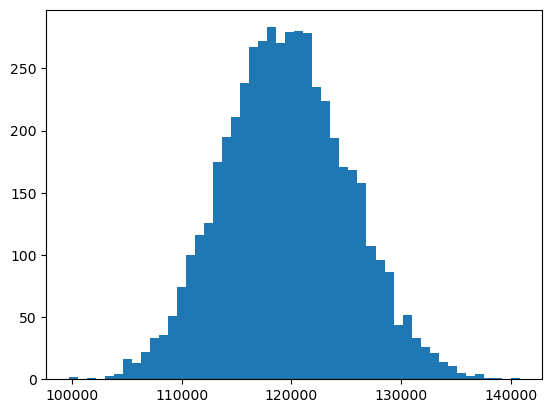

In [56]:
import matplotlib.pyplot as plt

plt.hist(so_boot_distn,bins=50)

In [57]:
std_error = np.std(so_boot_distn, ddof=1)
std_error

5687.3966082519355

In [58]:
mean_comp_hyp = 110000

In [59]:
z_score = (mean_comp_samp - mean_comp_hyp) / std_error
z_score

1.683497396295066

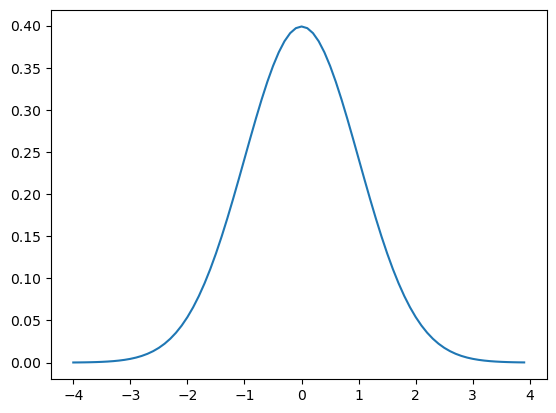

In [60]:
#z ortalaması 0 sapması 1 olan bir dağılımdır

from scipy.stats import norm

z_data = np.arange(-4, 4, 0.1)

plt.plot(z_data, norm.pdf(z_data, loc = 0, scale = 1))